In [58]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stops = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
%matplotlib inline

In [59]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [61]:
df=pd.read_csv('LibCon03-06-2018.csv')

df.shape

(3842, 18)

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


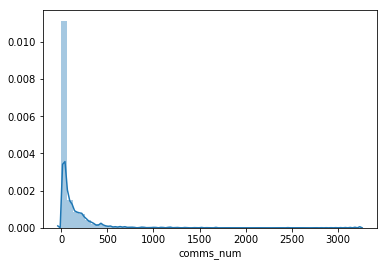

In [62]:
sns.distplot(df['comms_num']);

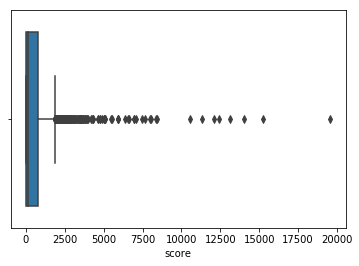

In [63]:
sns.boxplot(x=df["score"]);

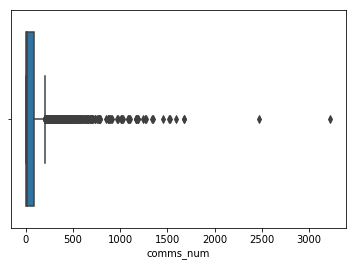

In [64]:
sns.boxplot(x=df["comms_num"]);

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


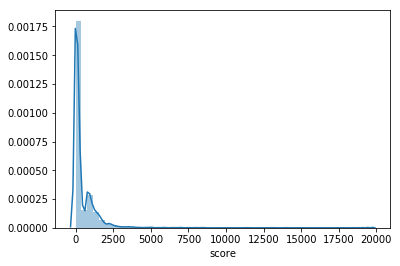

In [65]:
sns.distplot(df['score']);

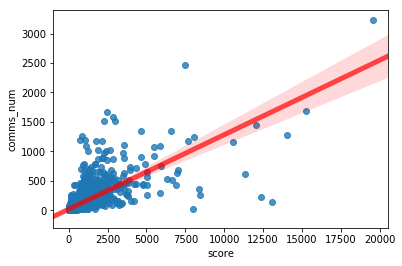

In [66]:
sns.regplot(x=df['score'], y=df["comms_num"], 
            line_kws={"color":"r","alpha":0.7,"lw":5});

In [67]:
# #Checking for a relationship between comments and upvotes
# plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
# plt.scatter(df['score'],df["comms_num"], c='b')
# plt.xlabel('Score')
# plt.ylabel('Comments')
# plt.title("Spoiler: Upvotes Seemingly has an Effect on Comments");

In [68]:
df.head(2)

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity
0,NaN,1,1.527722e+09,medium.com,8n9e7d,1,Conservative,2018-05-30 22:07:10.938189+00:00,The Day I Learned We Had a Fake News Problem,2018-05-30 23:17:28.000000,2018-05-30 22:07:10.938189,23.0,23,Sun,10,-0.38,-0.5,1.0
1,NaN,0,1.527281e+09,medium.com,8m1ean,8,Conservative,2018-05-30 22:07:10.938189+00:00,Jordan Peterson LBC Interview: A Few Highlights,2018-05-25 20:35:45.000000,2018-05-30 22:07:10.938189,2.0,20,Sun,7,-0.48,-0.2,0.1


In [69]:
df['subj_label'] = 'neutral'
df.loc[df['subjectivity'] > 0.1, 'subj_label'] = 'great news'
df.loc[df['subjectivity'] < -0.1, 'subj_label'] = 'fake news'
df.head(3)

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,subj_label
0,NaN,1,1.527722e+09,medium.com,8n9e7d,1,Conservative,2018-05-30 22:07:10.938189+00:00,The Day I Learned We Had a Fake News Problem,2018-05-30 23:17:28.000000,2018-05-30 22:07:10.938189,23.0,23,Sun,10,-0.38,-0.50,1.00,great news
1,NaN,0,1.527281e+09,medium.com,8m1ean,8,Conservative,2018-05-30 22:07:10.938189+00:00,Jordan Peterson LBC Interview: A Few Highlights,2018-05-25 20:35:45.000000,2018-05-30 22:07:10.938189,2.0,20,Sun,7,-0.48,-0.20,0.10,neutral
2,NaN,0,1.527121e+09,thefederalist.com,8lko53,7,Conservative,2018-05-30 22:07:10.938189+00:00,James Clapper Just Lied Again About His Previo...,2018-05-24 00:21:14.000000,2018-05-30 22:07:10.938189,22.0,0,Sun,12,0.59,-0.17,0.17,great news


In [70]:
df['subjectivity'].describe()

count    3842.000000
mean        0.269157
std         0.309577
min         0.000000
25%         0.000000
50%         0.150000
75%         0.500000
max         1.000000
Name: subjectivity, dtype: float64

In [71]:
df['sent_label'] = 'neutral'
df.loc[df['sentiment'] > 0.1, 'sent_label'] = 'positive'
df.loc[df['sentiment'] < -0.1, 'sent_label'] = 'negative'
df.head(3)
    

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,subj_label,sent_label
0,NaN,1,1.527722e+09,medium.com,8n9e7d,1,Conservative,2018-05-30 22:07:10.938189+00:00,The Day I Learned We Had a Fake News Problem,2018-05-30 23:17:28.000000,2018-05-30 22:07:10.938189,23.0,23,Sun,10,-0.38,-0.50,1.00,great news,negative
1,NaN,0,1.527281e+09,medium.com,8m1ean,8,Conservative,2018-05-30 22:07:10.938189+00:00,Jordan Peterson LBC Interview: A Few Highlights,2018-05-25 20:35:45.000000,2018-05-30 22:07:10.938189,2.0,20,Sun,7,-0.48,-0.20,0.10,neutral,negative
2,NaN,0,1.527121e+09,thefederalist.com,8lko53,7,Conservative,2018-05-30 22:07:10.938189+00:00,James Clapper Just Lied Again About His Previo...,2018-05-24 00:21:14.000000,2018-05-30 22:07:10.938189,22.0,0,Sun,12,0.59,-0.17,0.17,great news,negative


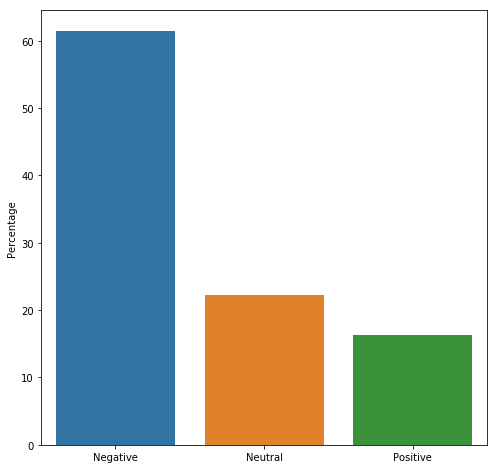

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.sent_label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

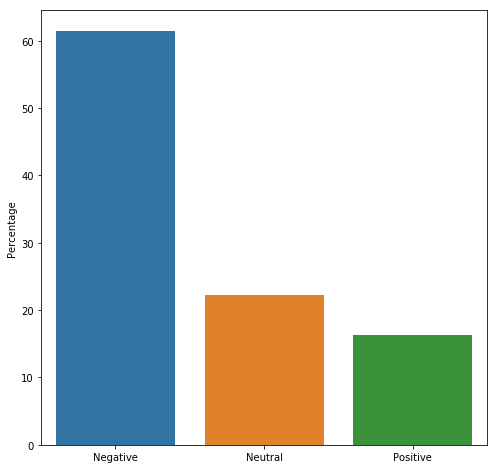

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.sent_label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

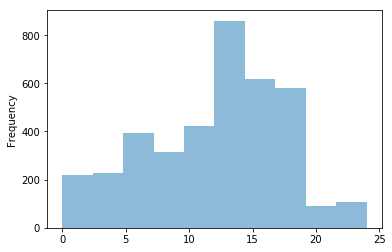

In [74]:
df['post_duration'].plot(kind='hist', alpha=.5);


In [75]:
df.select_dtypes(include=['O']).columns.values

array(['body', 'domain', 'id', 'subreddit', 'time_retrieved', 'title',
       'time', 'time_retrieved.1', 'day', 'subj_label', 'sent_label'],
      dtype=object)

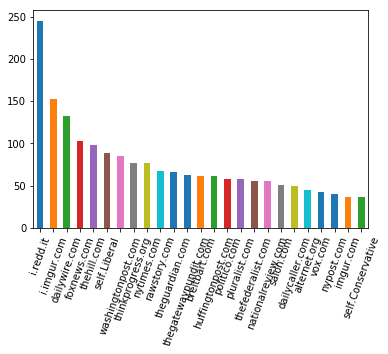

In [76]:
df['domain'].value_counts().head(25).plot(kind='bar')
plt.xticks(rotation=70);

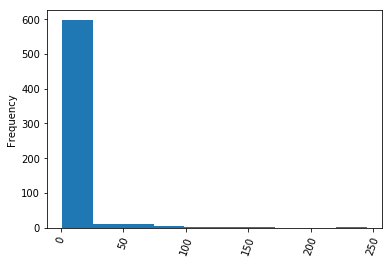

In [77]:
df['domain'].value_counts().plot(kind='hist')
plt.xticks(rotation=70);

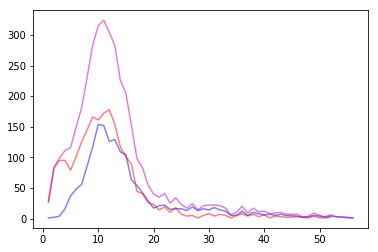

In [144]:
df[df['subreddit']=='Liberal']['word_count'].value_counts().sort_index().plot(color='b', alpha=.5);
df[df['subreddit']=='Conservative']['word_count'].value_counts().sort_index().plot(color='r', alpha=.5);
df['word_count'].value_counts().sort_index().plot(color='m', alpha=.5);

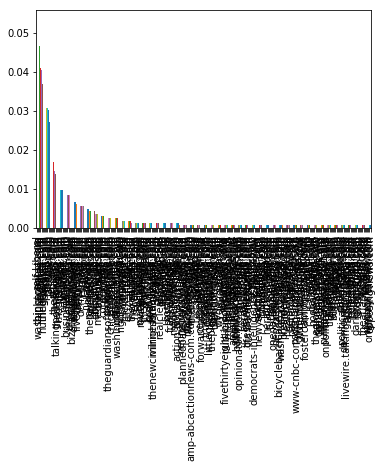

In [78]:
df[df['subreddit']=='Liberal']['domain'].value_counts(3).plot(kind='bar')
# Con_news= df[df['subreddit']=='Conservative']['domain'].value_counts(40)
# Lib_news

In [79]:
df

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,subj_label,sent_label
0,NaN,1,1.527722e+09,medium.com,8n9e7d,1,Conservative,2018-05-30 22:07:10.938189+00:00,The Day I Learned We Had a Fake News Problem,2018-05-30 23:17:28.000000,2018-05-30 22:07:10.938189,23.0,23,Sun,10,-0.38,-0.50,1.00,great news,negative
1,NaN,0,1.527281e+09,medium.com,8m1ean,8,Conservative,2018-05-30 22:07:10.938189+00:00,Jordan Peterson LBC Interview: A Few Highlights,2018-05-25 20:35:45.000000,2018-05-30 22:07:10.938189,2.0,20,Sun,7,-0.48,-0.20,0.10,neutral,negative
2,NaN,0,1.527121e+09,thefederalist.com,8lko53,7,Conservative,2018-05-30 22:07:10.938189+00:00,James Clapper Just Lied Again About His Previo...,2018-05-24 00:21:14.000000,2018-05-30 22:07:10.938189,22.0,0,Sun,12,0.59,-0.17,0.17,great news,negative
3,NaN,1,1.527116e+09,powerlineblog.com,8lk0tw,8,Conservative,2018-05-30 22:07:10.938189+00:00,"James Clapper: Leaker, Liar & Sleazeball",2018-05-23 22:59:03.000000,2018-05-30 22:07:10.938189,23.0,22,Sun,6,0.00,0.00,0.00,neutral,neutral
4,NaN,6,1.527159e+09,oann.com,8lpd1h,3,Conservative,2018-05-30 22:07:10.938189+00:00,452 Caravan Illegal Aliens Broke Into U.S. & A...,2018-05-24 10:54:06.000000,2018-05-30 22:07:10.938189,11.0,10,Sun,16,0.00,-0.25,0.75,great news,negative
5,NaN,1,1.527127e+09,nytimes.com,8lli4a,5,Conservative,2018-05-30 22:07:10.938189+00:00,"Deep in the Desert, Iran Quietly Advances Miss...",2018-05-24 02:04:17.000000,2018-05-30 22:07:10.938189,20.0,2,Sun,9,0.00,0.00,0.37,great news,neutral
6,NaN,4,1.527127e+09,m.oxfordeagle.com,8llg43,5,Conservative,2018-05-30 22:07:10.938189+00:00,Show me the man and I'll show you the crime,2018-05-24 01:57:33.000000,2018-05-30 22:07:10.938189,20.0,1,Sun,10,-0.53,0.00,0.00,neutral,neutral
7,NaN,1,1.527123e+09,newsbusters.org,8lkvyb,7,Conservative,2018-05-30 22:07:10.938189+00:00,Irony: Brian Williams Worries About Claims Tru...,2018-05-24 00:48:27.000000,2018-05-30 22:07:10.938189,21.0,0,Sun,10,0.00,0.00,0.00,neutral,neutral
8,NaN,4,1.527123e+09,nytimes.com,8lkurx,7,Conservative,2018-05-30 22:07:10.938189+00:00,N.F.L. Teams Will Be Fined for Players’ Anthem...,2018-05-24 00:44:31.000000,2018-05-30 22:07:10.938189,21.0,0,Sun,9,0.36,0.00,0.00,neutral,neutral
9,NaN,23,1.527059e+09,dailycaller.com,8leiqe,155,Conservative,2018-05-30 22:07:10.938189+00:00,Meghan McCain Dares Her Cohosts On 'The View' ...,2018-05-23 07:08:00.000000,2018-05-30 22:07:10.938189,15.0,7,Sun,15,-0.46,0.00,0.00,neutral,neutral


In [80]:
df.groupby('subreddit')['domain'].value_counts()


subreddit     domain                         
Conservative  i.redd.it                          245
              i.imgur.com                        153
              dailywire.com                      132
              foxnews.com                        102
              thegatewaypundit.com                63
              breitbart.com                       61
              nationalreview.com                  55
              thefederalist.com                   55
              dailycaller.com                     50
              thehill.com                         47
              imgur.com                           37
              nypost.com                          37
              self.Conservative                   37
              newsbusters.org                     31
              hotair.com                          29
              pjmedia.com                         26
              townhall.com                        26
              babylonbee.com                      22


In [81]:
# list(set(x).intersection(f))

In [82]:
df_Lib=df[df['subreddit']=='Liberal'] 
df_Con=df[df['subreddit']=='Conservative']

In [83]:
Lib_news= df_Lib['domain'].value_counts().head(30).index.tolist() 
Con_news= df_Con['domain'].value_counts().head(30).index.tolist() 

# df['domain_d'] = [type_ if type_ in DD
#                       else "OTHER" for type_ in df['domain']]

# df['domain_d'].value_counts()
News_Comm=list(set(Con_news+Lib_news))
df['domain_d'] = [type_ if type_ in News_Comm
                      else "OTHER" for type_ in df['domain']]

df['domain_d'].value_counts()

OTHER                     1252
i.redd.it                  245
i.imgur.com                153
dailywire.com              132
foxnews.com                103
thehill.com                 98
self.Liberal                88
washingtonpost.com          85
thinkprogress.org           77
nytimes.com                 77
rawstory.com                67
theguardian.com             66
thegatewaypundit.com        63
breitbart.com               61
huffingtonpost.com          61
pluralist.com               58
politico.com                58
thefederalist.com           56
nationalreview.com          56
salon.com                   51
dailycaller.com             50
alternet.org                45
vox.com                     42
nypost.com                  40
imgur.com                   37
self.Conservative           37
cnn.com                     35
newsbusters.org             31
hotair.com                  29
prospect.org                28
townhall.com                26
pjmedia.com                 26
theatlan

In [84]:
len(News_Comm)

59

In [85]:
# DD= df['domain'].value_counts().head(2).index.tolist() 


# df['domain_d'] = [type_ if type_ in DD
#                       else "OTHER" for type_ in df['domain']]

# df['domain_d'].value_counts()

In [86]:
cat_features = df.select_dtypes(include = ["object"]).columns
num_features = df.select_dtypes(exclude = ["object"]).columns
df_num = df[num_features]
df_cat = df[cat_features]
print("Numerical features : " + str(len(num_features)))
print(df.select_dtypes(exclude=['O']).columns.values)
print("Categorical features : " + str(len(cat_features)))
print((df.select_dtypes(include=['O']).columns.values))
# train_num = train[numerical_features]
# train_cat = train[categorical_features]

Numerical features : 9
['comms_num' 'created' 'score' 'post_duration' 'time_hm' 'word_count'
 'sent_sia' 'sentiment' 'subjectivity']
Categorical features : 12
['body' 'domain' 'id' 'subreddit' 'time_retrieved' 'title' 'time'
 'time_retrieved.1' 'day' 'subj_label' 'sent_label' 'domain_d']


In [87]:
print('Scores')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.score),np.median(df.score)))
print('Number of coments')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.comms_num),np.median(df.comms_num)))



Scores
Mean is 487.85 and the Median is 147.00
Number of coments
Mean is 79.30 and the Median is 14.00


In [88]:
le=LabelEncoder()
X = df[['word_count','sentiment','subjectivity','domain_d','post_duration']]
X_n=df[['word_count','sentiment','subjectivity','domain','title','post_duration']]
# y=df_combined['subreddit']
# transform the label 
y = le.fit_transform(df['subreddit'])
# y_cm = LabelEncoder().fit_transform(df['comments_label'])

In [89]:
df.subreddit.value_counts()

Conservative    2184
Liberal         1658
Name: subreddit, dtype: int64

In [90]:
y.sum()

1658

In [91]:
X_d = pd.get_dummies(X, columns=['domain_d'], drop_first=True)

In [92]:
X_d.shape

(3842, 63)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.5, random_state=42)


In [94]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)
lr=LogisticRegression()

In [95]:
lr.fit(X_train, y_train)
print('Log Reg')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

forest.fit(X_train, y_train)
print('\n Random Forest')
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

Log Reg
0.8334200937011973
0.8302967204580948

 Random Forest
0.754294638209266
0.7589796980739199


In [96]:
# so we choose log reg


## Predict on pol


In [97]:
df_pol=pd.read_csv('Pol03-06-2018.csv')

df_pol.shape

(3382, 18)

In [123]:
DD_p= df_pol['domain'].value_counts().head(59).index.tolist()


# df['domain_d'] = [type_ if type_ in News_Comm
#                       else "OTHER" for type_ in df['domain']]
df_pol['domain_d'] = [type_ if type_ in DD_p
                      else "OTHER" for type_ in df_pol['domain']]
print(df_pol['domain_d'].nunique())
print(df['domain_d'].nunique())

60
60


In [110]:
df

50

In [118]:
print('Scores')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.score),np.median(df.score)))
print('Number of coments')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.comms_num),np.median(df.comms_num)))



Scores
Mean is 487.85 and the Median is 147.00
Number of coments
Mean is 79.30 and the Median is 14.00


In [124]:
df_pol_t = df_pol[['word_count','sentiment','subjectivity','domain_d','post_duration']]
# X_n=df[['word_count','sentiment','subjectivity','domain','title','post_duration']]
# y=df_combined['subreddit']
# transform the label 
# y = LabelEncoder().fit_transform(df['subreddit'])
# y_cm = LabelEncoder().fit_transform(df['comments_label'])

In [ ]:
len()

In [125]:
df_pol_t.domain_d.nunique()



60

In [126]:
df_pol_d=pd.get_dummies(df_pol_t, columns=['domain_d'], drop_first=True)

In [127]:
df_pol_d.head(3)

,word_count,sentiment,subjectivity,post_duration,domain_d_abcnews.go.com,domain_d_apnews.com,domain_d_arstechnica.com,domain_d_axios.com,domain_d_bbc.com,domain_d_bloomberg.com,...,domain_d_time.com,domain_d_usatoday.com,domain_d_usnews.com,domain_d_vanityfair.com,domain_d_vox.com,domain_d_washingtonexaminer.com,domain_d_washingtonpost.com,domain_d_wsj.com,domain_d_yahoo.com,domain_d_youtube.com
0,9,0.00,0.07,18.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,-0.03,0.37,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,0.00,0.00,19.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
y_hat = lr.predict(df_pol_d)

df_pol['y_hats'] = y_hat

In [129]:
df_pol['pol_id']= le.inverse_transform(df_pol['y_hats'])

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
LabelEncoder()

In [130]:
df_pol.head(3)

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,...,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,domain_d,y_hats,pol_id
0,NaN,541,1.527738e+09,abcnews.go.com,8nbldk,1519,politics,2018-05-30 22:07:10.938189+00:00,Melania Trump Not Seen by Public in 20 Days,2018-05-31 03:45:37.000000,...,18.0,3,Sun,9,-0.68,0.00,0.07,abcnews.go.com,1,Liberal
1,NaN,124,1.527717e+09,thinkprogress.org,8n8qnw,2600,politics,2018-05-30 22:07:10.938189+00:00,The ‘Don’t Vote Early’ campaign and the pro-Tr...,2018-05-30 21:53:16.000000,...,0.0,21,Sun,13,0.66,-0.03,0.37,thinkprogress.org,0,Conservative
2,NaN,31,1.527737e+09,theguardian.com,8nbemi,551,politics,2018-05-30 22:07:10.938189+00:00,Ambien manufacturer responds to Roseanne blami...,2018-05-31 03:22:42.000000,...,19.0,3,Sun,25,-0.15,0.00,0.00,theguardian.com,1,Liberal


In [ ]:
df_pol.pol_id.value_counts()

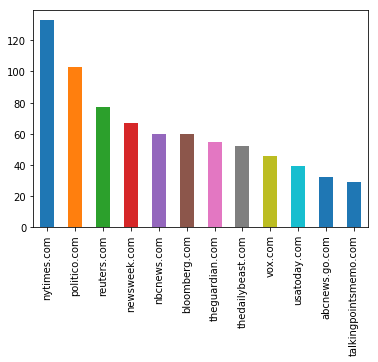

In [132]:
df_pol[df_pol['pol_id']=='Liberal']['domain'].value_counts().head(12).plot(kind='bar');

In [137]:
df_pol[df_pol['pol_id']=='Conservative']['domain'].value_counts()

thehill.com                 337
washingtonpost.com          257
cnn.com                     115
independent.co.uk           113
thinkprogress.org            77
cnbc.com                     77
businessinsider.com          66
huffingtonpost.com           59
apnews.com                   59
msnbc.com                    47
nymag.com                    45
self.politics                37
slate.com                    33
cbsnews.com                  32
npr.org                      28
axios.com                    27
theweek.com                  26
buzzfeed.com                 24
edition.cnn.com              23
motherjones.com              23
theatlantic.com              22
arstechnica.com              19
yahoo.com                    19
bbc.com                      16
vanityfair.com               15
marketwatch.com              14
chicagotribune.com           12
dallasnews.com               10
seattletimes.com             10
lawandcrime.com               9
                           ... 
bigstory

In [136]:
df_pol[(df_pol['domain'] == 'nationalreview.com' )]

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,...,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,domain_d,y_hats,pol_id
1731,NaN,21,1.527977e+09,nationalreview.com,8o0qyc,145,politics,2018-06-03 13:25:38.752841+00:00,Border Patrol Seized 64-Year-Old Immigrant's L...,2018-06-02 22:05:12.000000,...,15.0,22,Sun,9,0.0,0.0,0.0,OTHER,0,Conservative
2885,NaN,2726,1.510378e+09,nationalreview.com,7c45a1,37613,politics,2018-06-03 13:25:38.752841+00:00,If You Refuse to Condemn Predators because of ...,2017-11-11 05:30:49.000000,...,8.0,5,Sun,11,0.0,-1.0,1.0,OTHER,1,Liberal


In [138]:
df_pol.sample(10)

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,...,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,domain_d,y_hats,pol_id
552,NaN,3,1.527699e+09,msnbc.com,8n71h0,21,politics,2018-05-31 13:51:33.816391+00:00,'Everyday Racism in America': Watch MSNBC's fu...,2018-05-30 16:55:50.000000,...,21.0,16,Sun,9,0.00,0.07,0.57,msnbc.com,0,Conservative
3039,NaN,2870,1.496975e+09,thehill.com,6g2qek,35199,politics,2018-06-03 13:25:38.752841+00:00,Dem senator: Trump should testify under oath,2017-06-09 02:17:03.000000,...,11.0,2,Sun,7,-0.27,0.00,0.00,thehill.com,0,Conservative
1491,NaN,31,1.527805e+09,cbc.ca,8nir8z,113,politics,2018-06-02 11:47:58.602123+00:00,U.S. will slap Canada with steel and aluminum ...,2018-05-31 22:16:35.000000,...,14.0,22,Sun,12,0.57,0.00,0.00,cbc.ca,1,Liberal
2936,NaN,1907,1.468294e+09,rare.us,4scrzl,36617,politics,2018-06-03 13:25:38.752841+00:00,Congress is going to try to expand the Patriot...,2016-07-12 03:27:35.000000,...,10.0,3,Sun,17,0.00,0.00,0.00,OTHER,0,Conservative
1303,NaN,128,1.527806e+09,fortune.com,8niti4,554,politics,2018-06-02 11:47:58.602123+00:00,Trump Said to Want to Ban Mercedes-Benz and Ot...,2018-05-31 22:25:06.000000,...,13.0,22,Sun,12,-0.38,-0.06,0.19,OTHER,0,Conservative
1948,NaN,1801,1.527847e+09,huffingtonpost.ca,8no5wu,8040,politics,2018-06-03 13:25:38.752841+00:00,Congressional Candidate in Virginia Admits He’...,2018-06-01 10:03:05.000000,...,3.0,10,Sun,8,-0.42,0.00,0.00,OTHER,0,Conservative
1163,NaN,10,1.527740e+09,crooked.com,8nbucl,69,politics,2018-06-01 11:06:40.193100+00:00,Roseanne and the Grand Trump Delusion,2018-05-31 04:15:57.000000,...,7.0,4,Sun,6,0.10,0.50,1.00,OTHER,0,Conservative
1782,NaN,36,1.527993e+09,chicagotribune.com,8o2i5b,30,politics,2018-06-03 13:25:38.752841+00:00,Virginia school board appeals decision in land...,2018-06-03 02:22:41.000000,...,11.0,2,Sun,10,0.00,0.00,0.00,chicagotribune.com,0,Conservative
957,NaN,20,1.527872e+09,cnn.com,8nqeux,0,politics,2018-06-01 11:06:40.193100+00:00,Rod Blagojevich's wife appeals to President Tr...,2018-06-01 16:53:50.000000,...,18.0,16,Sun,11,0.00,0.00,0.00,cnn.com,0,Conservative
3194,NaN,2213,1.516580e+09,businessinsider.com,7ryke5,33224,politics,2018-06-03 13:25:38.752841+00:00,Democratic senator calls Trump 'Cadet Bone Spu...,2018-01-22 00:17:56.000000,...,13.0,0,Sun,17,0.40,-0.10,0.10,businessinsider.com,0,Conservative
